1.Đọc dữ liệu 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/heart_2020_cleaned.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [2]:
# group by AgeCategory and print this group
df.groupby('PhysicalHealth').size()

PhysicalHealth
0.0     226589
1.0      10489
2.0      14880
3.0       8617
4.0       4468
5.0       7606
6.0       1270
7.0       4629
8.0        924
9.0        180
10.0      5453
11.0        85
12.0       605
13.0        91
14.0      2893
15.0      5012
16.0       135
17.0       110
18.0       167
19.0        35
20.0      3216
21.0       626
22.0        89
23.0        46
24.0        67
25.0      1164
26.0        66
27.0       124
28.0       446
29.0       204
30.0     19509
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

2.Làm sạch dữ liệu

In [4]:
df.duplicated().sum()

18078

In [5]:
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

In [6]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [8]:
count_target = df['HeartDisease'].value_counts()
count_target

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

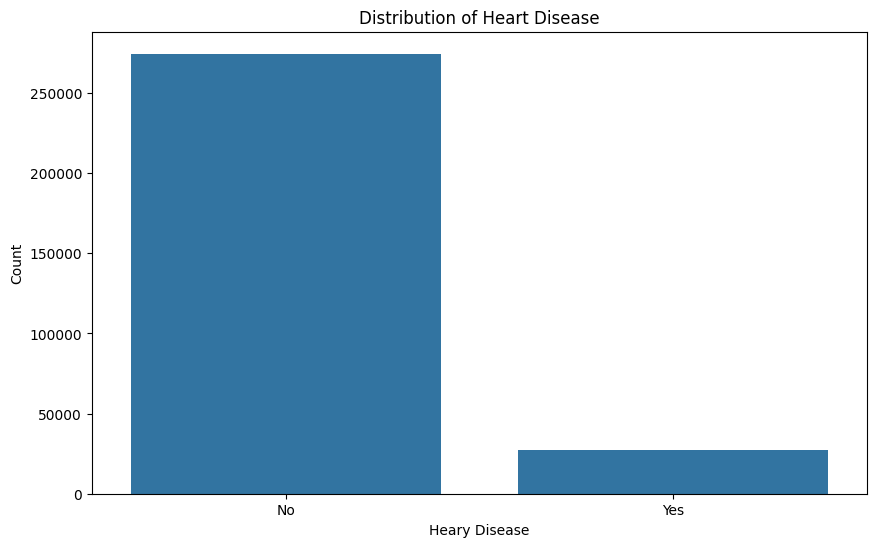

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=count_target.index, y=count_target.values)
plt.title('Distribution of Heart Disease')#Phân bố bệnh tim 
plt.xlabel('Heary Disease')
plt.ylabel('Count')
plt.show()

*Nhận xét : - Số lượng người không mắc bệnh tim chiếm phần lớn: Phần lớn các mẫu 
            dữ liệu đều thuộc nhóm người không mắc bệnh tim, biểu thị bằng cột cao hơn nhiều ở vị trí "No".
            - Số lượng người mắc bệnh tim chiếm tỷ lệ nhỏ: Số lượng người mắc bệnh tim chỉ chiếm một phần rất nhỏ so với tổng số mẫu dữ liệu, thể hiện bằng cột thấp hơn ở vị trí "Yes".


In [10]:
df['PhysicalHealth'].unique()

array([ 3.,  0., 20., 28.,  6., 15.,  5., 30.,  7.,  1.,  2., 21.,  4.,
       10., 14., 18.,  8., 25., 16., 29., 27., 17., 24., 12., 23., 26.,
       22., 19.,  9., 13., 11.])

In [11]:
df['MentalHealth'].unique()

array([30.,  0.,  2.,  5., 15.,  8.,  4.,  3., 10., 14., 20.,  1.,  7.,
       24.,  9., 28., 16., 12.,  6., 25., 17., 18., 21., 29., 22., 13.,
       23., 27., 26., 11., 19.])

In [12]:
df['BMI'].unique()

array([16.6 , 20.34, 26.58, ..., 62.42, 51.46, 46.56])

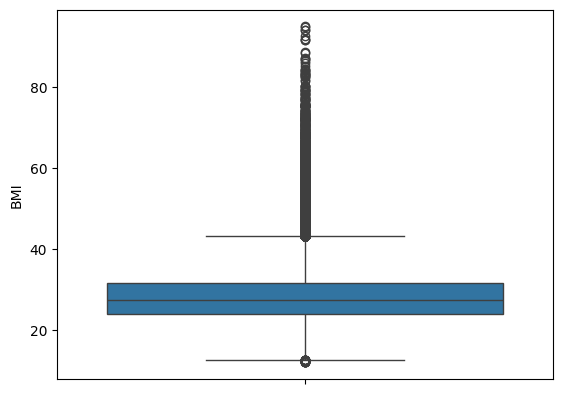

In [13]:
sns.boxplot(df['BMI'])
plt.show()

3.Xử lý các giá trị ngoại lệ

In [14]:
def remove_outliers_from_dataframe(df):
    
    for column in df.columns:
        if column in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
        
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
        
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [15]:
df=remove_outliers_from_dataframe(df)

In [16]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']  

In [17]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [18]:
df[['BMI', 'BMI_Category']].head(10)

,BMI,BMI_Category
1,20.34,Normal weight
3,24.21,Normal weight
7,31.64,Obesity I
8,26.45,Overweight
9,40.69,Obesity III
11,28.71,Overweight
12,28.37,Overweight
15,29.18,Overweight
16,26.26,Overweight
18,29.86,Overweight


4.Tiền xử lý

In [26]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ordinal_cols = ["BMI_Category", "AgeCategory", "Race", "GenHealth"]
boolean_cols = [
    "HeartDisease",
    "Sex",
    "Smoking",
    "AlcoholDrinking",
    "Stroke",
    "DiffWalking",
    "Diabetic",
    "PhysicalActivity",
    "Asthma",
    "KidneyDisease",
    "SkinCancer",
]

ordinal_mappings = {
    "BMI_Category": [
        "Underweight",
        "Normal weight",
        "Overweight",
        "Obesity I",
        "Obesity II",
        "Obesity III",
    ],
    "AgeCategory": [
        "18-24",
        "25-29",
        "30-34",
        "35-39",
        "40-44",
        "45-49",
        "50-54",
        "55-59",
        "60-64",
        "65-69",
        "70-74",
        "75-79",
        "80 or older",
    ],
    "Race": [
        "White",
        "Black",
        "Asian",
        "Hispanic",
        "American Indian/Alaskan Native",
        "Other",
    ],
    "GenHealth": ["Poor", "Fair", "Good", "Very good", "Excellent"],
}


preprocessor = ColumnTransformer(
    transformers=[
        (
            "ord",
            OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols]),
            ordinal_cols,
        ),  # Ordinal encoding
        (
            "ohe",
            OneHotEncoder(drop="first"),
            boolean_cols,
        ),  # OneHotEncoding for boolean columns
    ],
    remainder="passthrough",
)


df_transformed = preprocessor.fit_transform(df)

# Convert the transformed data back to a DataFrame with appropriate column names
# Ordinal columns retain original names, while OneHotEncoder generates new columns
ohe_columns = preprocessor.named_transformers_["ohe"].get_feature_names_out(
    boolean_cols
)
final_columns = (
    ordinal_cols
    + list(ohe_columns)
    + [col for col in df.columns if col not in ordinal_cols + boolean_cols]
)

df_encoded = pd.DataFrame(df_transformed, columns=final_columns)

In [27]:
df_encoded.head()

,BMI_Category,AgeCategory,Race,GenHealth,HeartDisease_Yes,Sex_Male,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,12.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
1,1.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,24.21,0.0,0.0,6.0
2,3.0,12.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,31.64,5.0,0.0,9.0
3,2.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,26.45,0.0,0.0,5.0
4,5.0,9.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,40.69,0.0,0.0,10.0


In [28]:
df_encoded.head()

,BMI_Category,AgeCategory,Race,GenHealth,HeartDisease_Yes,Sex_Male,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,12.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,20.34,0.0,0.0,7.0
1,1.0,11.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,24.21,0.0,0.0,6.0
2,3.0,12.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,31.64,5.0,0.0,9.0
3,2.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,26.45,0.0,0.0,5.0
4,5.0,9.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,40.69,0.0,0.0,10.0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [30]:
X = df_encoded.drop('HeartDisease_Yes', axis=1)  
y = df_encoded['HeartDisease_Yes']  

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled= scale.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

5.Lấy lại mẫu

In [33]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

6. Xây dựng mô hình

In [34]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Display the results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return accuracy 

7.RandomForest

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

Accuracy: 0.86
Precision: 0.25
Recall: 0.44
F1: 0.32


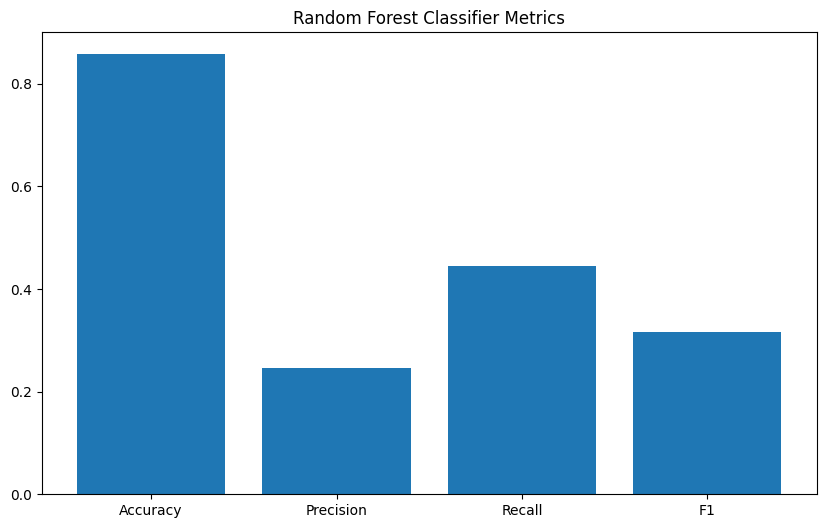

In [39]:
# rf_accuracy= evaluate_model(rf, X_test, y_test, 'Random Forest Classifier')
# rf_accuracy

from sklearn.metrics import f1_score, precision_score, recall_score


accuracy = accuracy_score(y_test, rf.predict(X_test))
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, rf.predict(X_test))
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, rf.predict(X_test))
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, rf.predict(X_test))
print(f"F1: {f1:.2f}")


plt.figure(figsize=(10, 6))
plt.bar(["Accuracy", "Precision", "Recall", "F1"], [accuracy, precision, recall, f1])
plt.title("Random Forest Classifier Metrics")
plt.show()

## Nhận xét mô hình :

1. Accuracy : (86%) Mô hình có độ chính xác ở mức tương đối, điều này cho thấy nó có khả năng dự đoán đúng một cách tương đối. Tuy nhiên cần xem xét thêm các độ đo khác để kết luận
2. Precision : (25%) : cho thấy trong số những trường hợp được dự đoán là mắc bệnh tim, chỉ có 25% là thực sự mắc bệnh. Điều này có nghĩa là mô hình có xu hướng đưa ra nhiều dự đoán dương tính giả (false positive). Trong ngữ cảnh dự đoán bệnh tim, điều này có thể dẫn đến việc nhiều người khỏe mạnh bị chẩn đoán nhầm là mắc bệnh, gây ra lo lắng và tốn kém cho các xét nghiệm y tế không cần thiết.
3. Recall (44%) : Đây là một con số tương đối tốt, nó cho thấy mô hình thực sự có hiệu quả trong việc phát hiện sớm các trường hợp dương tính chính xác
4. F1 Score (32%) : Các giá trị này ở mức trung bình cho thấy mô hình chưa thực sự tốt trong việc xác định những người mắc bệnh tim. Tuy nhiên nó cũng sẽ là một tín hiệu tốt cho thấy mô hình cũng có độ phản ứng tương đối đối với các dữ liệu được dụ đoán